# Open AP tif files

Ariel photography files from blueskyare .tif, use rasterio

## Libraries

In [1]:
import os
import glob
import sys
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

%matplotlib inline
pd.set_option('display.max_column', 100) #set max number of cols to display before ...

import rasterio
#https://rasterio.readthedocs.io/en/latest/
import rasterio.warp
import rasterio.features
from rasterio import plot #essential to plot images in BNG, in correct posiiton, and full RGB 

import shapely
import mplleaflet
import folium
import fiona
import pyproj
import contextily

In [2]:
#check correct environment is being used: parkprov
print(sys.executable)

/Users/tamsinforbes/anaconda3/envs/parkprov/bin/python


## Open a tif file

- https://rasterio.readthedocs.io/en/latest/quickstart.html
- https://rasterio.readthedocs.io/en/latest/topics/reading.html

#### Info
A raster **band** is represented in GDAL with the GDALRasterBand class. It represents a single raster band/channel/layer. It does not necessarily represent a whole image. *For instance, a 24bit RGB image would normally be represented as a dataset with three bands, one for red, one for green and one for blue.* So I think I can assume that my 3 bands in the AP tif files are one each for red, green, blue. Although they are just numbers so when plotting could come out as different colours. 
- Band 1: Red values
- Band 2: Green values
- Band 3: Blue values

In [9]:
ealing_tif_paths = glob.glob(
    '../data/APEaling_111706_20200601/25cm_Aerial_Photo/111706-1_RGB_1_Shape/*.tif', recursive=True)

In [46]:
#ealing_tif_paths

In [38]:
ealing_tif_paths[10]

'../data/APEaling_111706_20200601/25cm_Aerial_Photo/111706-1_RGB_1_Shape/TQ1980.tif'

#### Open link to tif file

This creates a link to the source tif file.

- each pixel represents 25cm square
- array is 4000 x 4000 and 3 band values are the 3 RGB numbers for that pixel
- plot is is 25cm units / pixel units
- 4000 25cm/pixel units is 1 km
- hence each tif file is a 1km grid

In [58]:
src = rasterio.open(ealing_tif_paths[10])

In [59]:
print("path: ", src.name, "\nmode: ", src.mode, "\nis closed?: ", src.closed
      , "\nband count: ", src.count, "\nshape: ", src.shape)


path:  ../data/APEaling_111706_20200601/25cm_Aerial_Photo/111706-1_RGB_1_Shape/TQ1980.tif 
mode:  r 
is closed?:  False 
band count:  3 
shape:  (4000, 4000)


In [60]:
#more information
print(src.profile)


{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4000, 'height': 4000, 'count': 3, 'crs': CRS.from_epsg(27700), 'transform': Affine(0.25, 0.0, 519000.0,
       0.0, -0.25, 181000.0), 'tiled': False, 'interleave': 'pixel'}


### Read bands & plot

Now read the data from the open source file and plot it.

#### Read Red band & plot

In [41]:
#read a single band
b1 = src.read(1) #specify band = 1, the R band - although these are 

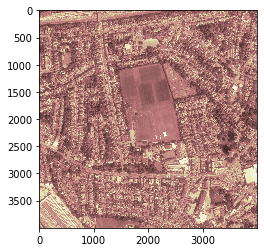

In [42]:
plt.imshow(b1, cmap='pink') #specify pink range, else default is used (greens/blues)

#### Read all bands and plot

In [32]:
d = src.read() #read all bands by default

In [34]:
d.shape #expect 3 x n x n array.

(3, 4000, 4000)

In [61]:
src.crs

CRS.from_epsg(27700)

### To do
- find grid reference for the tif file squares
- how to read in multiple tif files and combine?
- how to overlay with OSMM at correct scale/position. From plotting in QGIS they are both in BNG
- create set of test images that represent the various different types of front gardens with and without off-street parking and 
    
    
#### Problems with images
- image angle: not all are from directly above
- image anlge will mean OSMM topo layer will not line up perfectly with the structures; for example bits of roof may appear to be in the front garden polygon.
- shadows obscure/overlay areas and the edge of a shadow may be misinterpreted as the edge of a structure
- difference in pavement materials and front garden paving materials may be interpreted as an edge
- pavement may be inconsistent colour, patched up
- front garden view obscured by tree foliage, either in front garden or on pavement.

#### Remedies
- barriers to vehicles must have a thickness
- manual classification of test images
- 

#### Indications of off-street parking
Collect images that represnt these
- area large enough to accommodate a vehicle (UK parking space is 2.4m by 4.8m, 11.52 square metres)
- shape; width and depth must be great enough to admit a vehicle shape
- colour; not green (very few green cars)
- car parked in image; roughly rectangular shapes; windscreen, rear window may be visible as black rectangles
- no barrier between property front garden and pavement
- gap in barrier wide enough for a vehicle

#### Indications of no off-street parking
- green front garden
- area too small
- shape not wide or deep enough to accommodate a vehicle
- barrier between front garden and pavement not wide enough to admit vehicle 

#### Edge cases
- front garden entirely paved but barrier exists
- difficult to determine barrier

In [ ]:
4000

In [43]:
2.4*4.8 #standard car park parking space size

11.52

In [36]:
#close source when finished
src.close()

## try to overlay tif and gpkg



### Read in highways layer as this is smallest

In [47]:
ehl_path = "../data/OSHighwaysNetworkApril2020_Ealing.gpkg"

In [51]:
for layername in fiona.listlayers(ehl_path):
    with fiona.open(ehl_path, layer=layername) as src:
        print(layername, len(src))

RoadLink 13507
Structure 1414
RoadNode 11017
RestrictionForVehicles 49
AccessRestriction 183


In [52]:
ehl = gpd.read_file(ehl_path, layer="RoadLink")

In [ ]:
ehl.plot(figsize=(20,20))

#set geometry
pfv1224 = pfv1224.set_geometry('geom_cen_buff')
print(pfv1224.geometry.name)
#plot
base = pfv1224.plot(alpha = 475, figsize=(10,10), color = 'purple' ) 
base.set_xlim(-11000000, -8500000)
base.set_ylim(-2000000, 2000000)
land.plot(ax = base, color = 'green', alpha = 75)

In [62]:
src.crs

CRS.from_epsg(27700)

In [63]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 4000, 'height': 4000, 'count': 3, 'crs': CRS.from_epsg(27700), 'transform': Affine(0.25, 0.0, 519000.0,
       0.0, -0.25, 181000.0), 'tiled': False, 'interleave': 'pixel'}

In [67]:
src.name

'../data/APEaling_111706_20200601/25cm_Aerial_Photo/111706-1_RGB_1_Shape/TQ1980.tif'

In [68]:
src.mode

'r'

In [70]:
src.count

3

In [71]:
src.shape

(4000, 4000)

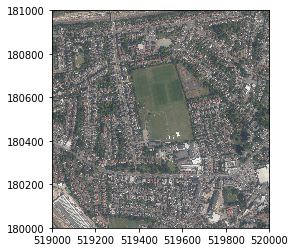

In [73]:
#make sure 'from rasterio import plot' is run ffs
plot.show(src)

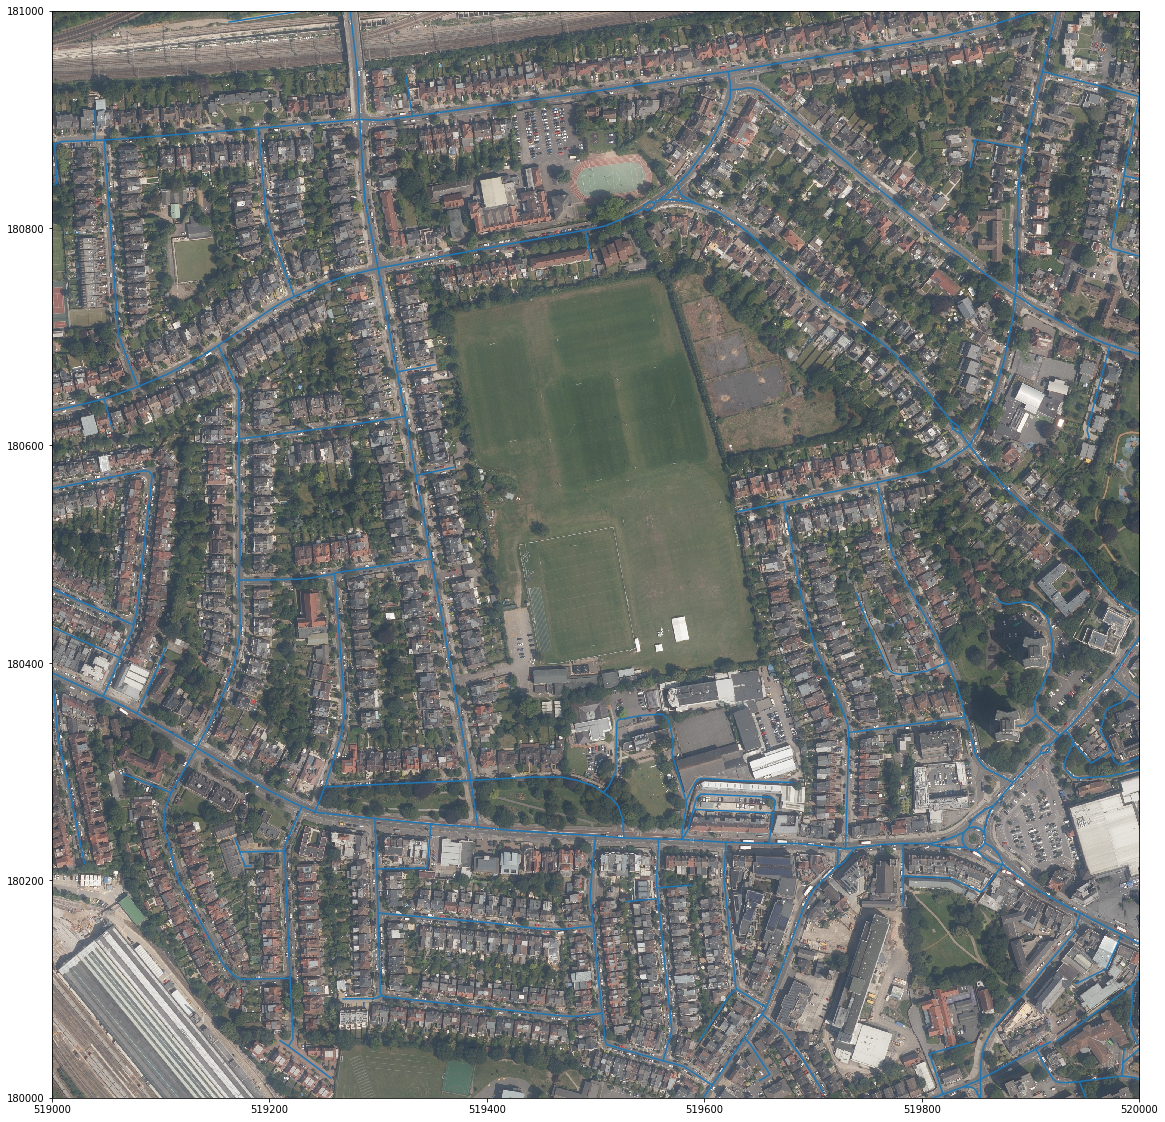

In [75]:
base = ehl.plot(figsize=(20,20)) #uses gpd plot method
plot.show(src, ax = base) #uses rasterio plot module
#finally! plots just the image with the Ealing highways layer that fits over the top
#axes clipped to extent of image
#figsize is defined in base

### Close shape

In [79]:
src.closed

False

In [82]:
src.close()

In [83]:
src.closed

True